In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit-card-default.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

 Default 0 means that The loan payment wasn't delayed.
 1 means load payment was delayed.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('defaulted',axis=1)
Y = df['defaulted']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [8]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
predictions  =  rfc.predict(x_test)

In [12]:
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.62      0.35      0.45      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.64      0.67      7500
weighted avg       0.79      0.81      0.79      7500



In [15]:
print(confusion_matrix(y_test,predictions))

[[5525  348]
 [1059  568]]


In [16]:
print(accuracy_score(y_test,predictions))

0.8124


In [17]:
from sklearn.model_selection import KFold,GridSearchCV

In [18]:
n_folds = 5
parameters = {'max_depth':range(2,20,5)}
rf = RandomForestClassifier()
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy')
rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [19]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.297190,0.047986,0.049010,0.004698,2,{'max_depth': 2},0.808889,0.801111,0.804889,0.803333,0.800222,0.803689,0.003075,4
1,3.144222,0.062464,0.075188,0.005240,7,{'max_depth': 7},0.820222,0.825778,0.819111,0.810889,0.813778,0.817956,0.005197,3
2,4.749820,0.094716,0.109403,0.002513,12,{'max_depth': 12},0.820667,0.821111,0.819111,0.818444,0.813778,0.818622,0.002612,2
3,6.276738,0.219714,0.145213,0.008647,17,{'max_depth': 17},0.819556,0.823333,0.819556,0.819333,0.812889,0.818933,0.003371,1


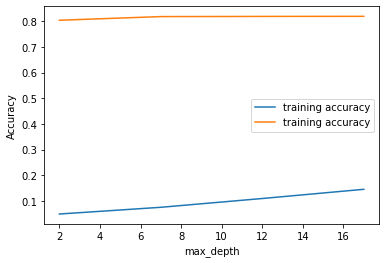

In [22]:
plt.figure()
plt.plot(scores['param_max_depth'], 
         scores['mean_score_time'],
         label='training accuracy')
plt.plot(scores['param_max_depth'], 
         scores['mean_test_score'],
         label='training accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
n_folds = 5
parameters = {'n_estimators':range(100,1500,200)}
rf = RandomForestClassifier()
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy')
rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 1500, 200)},
             scoring='accuracy')

In [24]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.736799,0.358257,0.186191,0.014875,100,{'n_estimators': 100},0.823556,0.821111,0.820667,0.812667,0.810667,0.817733,0.005090,7
1,23.284366,1.865055,0.529992,0.016403,300,{'n_estimators': 300},0.821333,0.823111,0.822000,0.815778,0.811111,0.818667,0.004548,4
2,38.570307,1.734465,0.911397,0.035703,500,{'n_estimators': 500},0.820667,0.822000,0.823333,0.816000,0.812222,0.818844,0.004132,3
3,49.635949,0.916953,1.212010,0.028156,700,{'n_estimators': 700},0.820222,0.821111,0.823556,0.814000,0.811556,0.818089,0.004538,6
4,63.664612,1.028709,1.547022,0.064169,900,{'n_estimators': 900},0.821778,0.824444,0.824444,0.814889,0.811778,0.819467,0.005196,1
